In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
# !pip install yellowbrick
# !pip install plotly

     |████████████████████████████████| 274 kB 7.6 MB/s 


In [13]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import os

import seaborn as sns

import sklearn
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
import plotly.express as px
from sklearn.cluster import KMeans

from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer

In [4]:
raw_data = pd.read_csv('drive/MyDrive/imdb.csv')

data = raw_data[raw_data['imdb_id'].notna()]
data = raw_data[raw_data['genres'].notna()]

raw_data.isnull().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

# First

### We parse values of genre column and create a dictionay which contains a list of imdb_id for each genre. and then sort the unique ids in each genre.

In [11]:
generes = {}
movie_indices = {}
movie_id_names = {}
movie_finance = {}

for i in data.index.values:
    if data.genres[i] == data.genres[i]:
        a = [str(i) for i in data.genres[i].split('{')]
        
        
        for movie in a:
            if len(movie) >= 2:
                elements = movie.split(',')
                id_genre = int(elements[0][elements[0].find(' ') + 1:])
                genre_movie = str(elements[1][elements[1].find(':') + 2 :elements[1].find('}')])
                genre_movie = genre_movie[1:-1]

                if genre_movie in generes:
                    generes[genre_movie] += [data.imdb_id[i]]
                if genre_movie not in generes:
                    generes[genre_movie] = [data.imdb_id[i]]

for k,v in dict(sorted(generes.items(), key=lambda item: len(item[1]))).items():
    print("Genrer", k, "Has", len(np.unique(v)), "Number of unique movies")

Genrer TV Movie Has 1 Number of unique movies
Genrer Foreign Has 31 Number of unique movies
Genrer Western Has 43 Number of unique movies
Genrer Documentary Has 87 Number of unique movies
Genrer Music Has 100 Number of unique movies
Genrer War Has 100 Number of unique movies
Genrer History Has 132 Number of unique movies
Genrer Animation Has 141 Number of unique movies
Genrer Mystery Has 225 Number of unique movies
Genrer Fantasy Has 232 Number of unique movies
Genrer Family Has 260 Number of unique movies
Genrer Science Fiction Has 290 Number of unique movies
Genrer Horror Has 301 Number of unique movies
Genrer Adventure Has 439 Number of unique movies
Genrer Crime Has 469 Number of unique movies
Genrer Romance Has 571 Number of unique movies
Genrer Action Has 741 Number of unique movies
Genrer Thriller Has 789 Number of unique movies
Genrer Comedy Has 1028 Number of unique movies
Genrer Drama Has 1531 Number of unique movies


### As you can see Drama, Drama, and Thriller are the most common genres.

# Second

### We calculate average revenue/budget ratios for movies.

In [12]:
genre_finance = {}
const = 10000

budget_per_genre = {}
revenue_per_genre = {}

for k,v in generes.items():
    budget_genre = 0
    revenue_genre = 0
    budget_per_genre[k] = []
    revenue_per_genre[k] = []
    for movie_id in v:
        bud_this = float(budget_genre + data[data.imdb_id == movie_id].budget)
        if bud_this > 0:
          budget_per_genre[k] += [bud_this]
        rev_this = float(revenue_genre + data[data.imdb_id == movie_id].revenue)
        if rev_this > 0:
          revenue_per_genre[k] += [rev_this]
        budget_genre = budget_genre + bud_this / const
        revenue_genre = revenue_genre + float(revenue_genre + data[data.imdb_id == movie_id].revenue) / const
    genre_finance[k] = revenue_genre / budget_genre

for k,v in dict(sorted(genre_finance.items(), key=lambda item: item[1])).items():
    print("Genrer", k, "Has", "{:.2f}".format(v), "revenue/budget ratio per movie")

Genrer Foreign Has 1.44 revenue/budget ratio per movie
Genrer History Has 1.69 revenue/budget ratio per movie
Genrer War Has 1.87 revenue/budget ratio per movie
Genrer Crime Has 2.51 revenue/budget ratio per movie
Genrer Thriller Has 2.59 revenue/budget ratio per movie
Genrer Mystery Has 2.66 revenue/budget ratio per movie
Genrer Western Has 2.69 revenue/budget ratio per movie
Genrer Drama Has 2.70 revenue/budget ratio per movie
Genrer Action Has 2.75 revenue/budget ratio per movie
Genrer Science Fiction Has 2.80 revenue/budget ratio per movie
Genrer Fantasy Has 3.11 revenue/budget ratio per movie
Genrer Comedy Has 3.20 revenue/budget ratio per movie
Genrer Adventure Has 3.25 revenue/budget ratio per movie
Genrer Music Has 3.26 revenue/budget ratio per movie
Genrer Family Has 3.27 revenue/budget ratio per movie
Genrer Romance Has 3.37 revenue/budget ratio per movie
Genrer Horror Has 3.47 revenue/budget ratio per movie
Genrer Animation Has 3.49 revenue/budget ratio per movie
Genrer Docu

### TV Movie genre just has one movie but its ratio is high, and Documentary, Animation and Horror has the highest rank after TV Movie genre.

# Third

### We parse the json and calculate the number of movies (imdb_id) for each company, and just like the first question we create a dictionary of production company and movies.

In [6]:
production_companies = {}
for i in data.index.values:

    if data.production_companies[i] == data.production_companies[i]:
        a = [str(i) for i in data.production_companies[i].split('{')]

        
        
        for company in a:
            if len(company) >= 2:
                company = company.split(',')[0]
                name = str(company[company.find('name') + 7:])
                name = name[1:-1]                
                if name in production_companies:
                    production_companies[name] += [data.imdb_id[i]]
                if name not in production_companies:
                    production_companies[name] = [data.imdb_id[i]]

for k,v in dict(sorted(production_companies.items(), key=lambda item: len(item[1]))).items():
  if len(np.unique(v)) > 10:
    print("Company", k, "Has", len(np.unique(v)), "Number of unique movies")

Company UK Film Council Has 11 Number of unique movies
Company TF1 Films Production Has 11 Number of unique movies
Company Ciné+ Has 11 Number of unique movies
Company Revolution Studios Has 11 Number of unique movies
Company Davis Entertainment Has 11 Number of unique movies
Company Canal+ España Has 11 Number of unique movies
Company Ingenious Film Partners Has 11 Number of unique movies
Company Scott Free Productions Has 11 Number of unique movies
Company Wild Bunch Has 11 Number of unique movies
Company EuropaCorp Has 12 Number of unique movies
Company Gaumont Has 12 Number of unique movies
Company Carolco Pictures Has 12 Number of unique movies
Company American Zoetrope Has 12 Number of unique movies
Company Dune Entertainment III Has 13 Number of unique movies
Company Happy Madison Productions Has 13 Number of unique movies
Company Studio Babelsberg Has 13 Number of unique movies
Company Lions Gate Films Has 13 Number of unique movies
Company The Weinstein Company Has 14 Number o

### As you can see Warner Bros., Universal Pictures and Paramount Pictures have the highest number of movies.

We did not print the company with less than 10 movies.

# Forth

<BarContainer object of 73 artists>

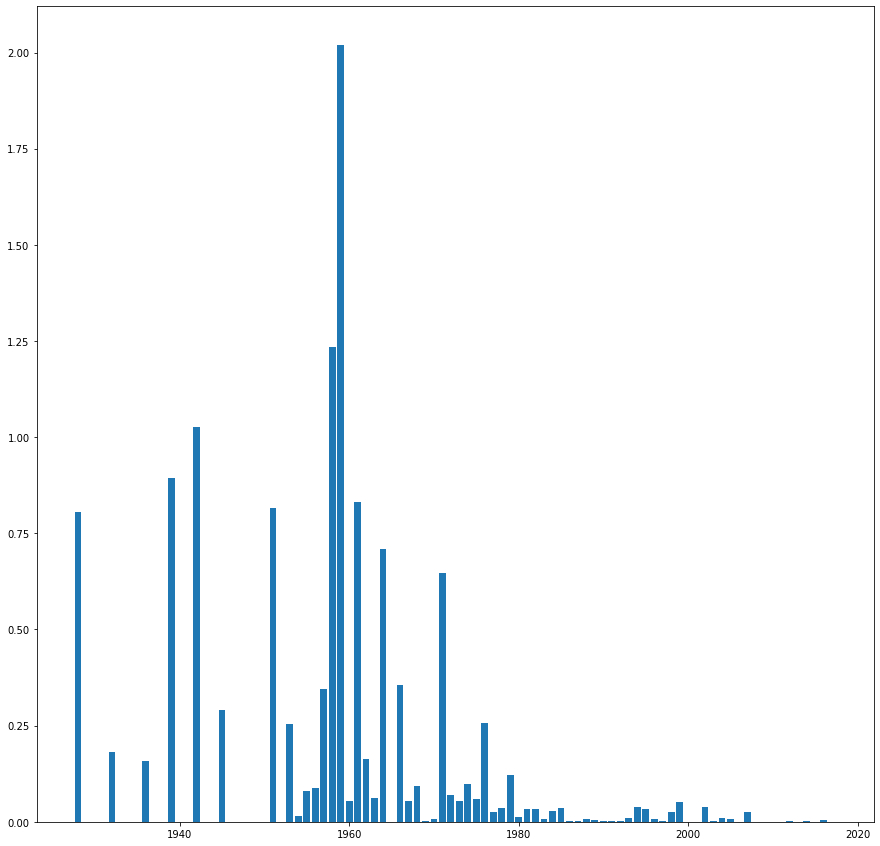

In [15]:
date_budget = {}
date_rev = {}

count_movie_per_year = {}

for i in data.index.values:
    if data.release_date[i] == data.release_date[i]:
        a = int([str(i) for i in data.release_date[i].split('/')][2])
        if a < 23:
            a += 2000
        else:
            a += 1900
        const = 1
            
        
        if a not in date_budget:
            date_budget[a] = float(data.budget[i]) / const
        else:
            date_budget[a] += float(data.budget[i]) / const
        if a not in date_rev:
            date_rev[a] = float(data.revenue[i]) / const
        else:
            date_budget[a] += float(data.revenue[i]) / const

        if a not in count_movie_per_year:
            count_movie_per_year[a] = 1
        else:
            count_movie_per_year[a] += 1      

years = list(date_budget.keys()) + list(date_rev.keys())
years = sorted(np.unique(years))
ratio = []
delete_year = []

for year in years:
    b,v = 0, 0
    if year in date_budget:
        b = date_budget[year]
    else:
        print(year)
    if year in date_rev:
        v = date_rev[year]
    else:
        print(year)
    if b == 0 or v == 0 or count_movie_per_year[year] < 3:
        delete_year += [year]
    else:
        if v / b > 9:
            delete_year += [year]
        else:
            ratio += [v / b]        
        
for del_year in delete_year:
    years.remove(del_year)

if len(years) != len(ratio):
    print('OH OH')

def addlabels(x,y, ax):
    for i in range(len(x)):
        ax.text(i,y[i],y[i])

fig, ax = plt.subplots(figsize=(15, 15))


ax.bar(years, ratio)

# Fifth

## At first we clean and normalized data

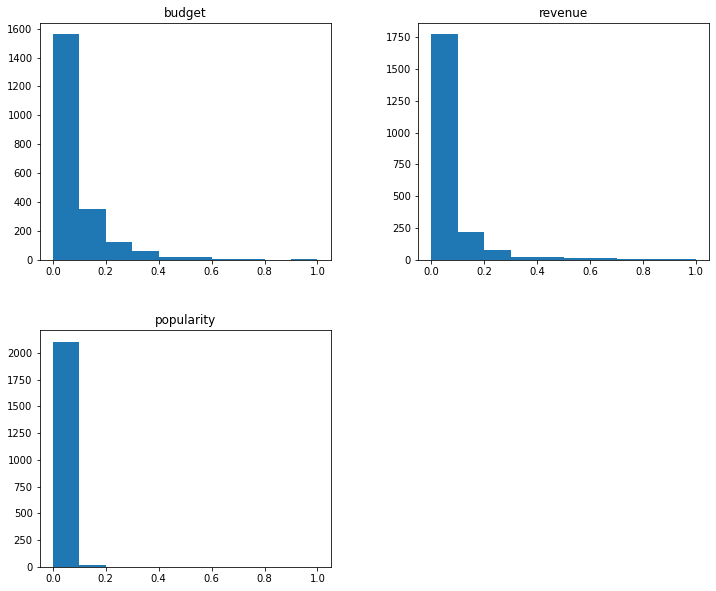

In [8]:
clean_data = data[['budget', 'revenue', 'popularity']]

clean_data = clean_data[clean_data.budget > 10000]
clean_data = clean_data[clean_data.revenue > 10000]
clean_data=(clean_data-clean_data.min())/(clean_data.max()-clean_data.min())
clean_data.hist(bins = 10, figsize = (12,10), grid = False)
plt.show()

## Then we drew the histogram of each feature

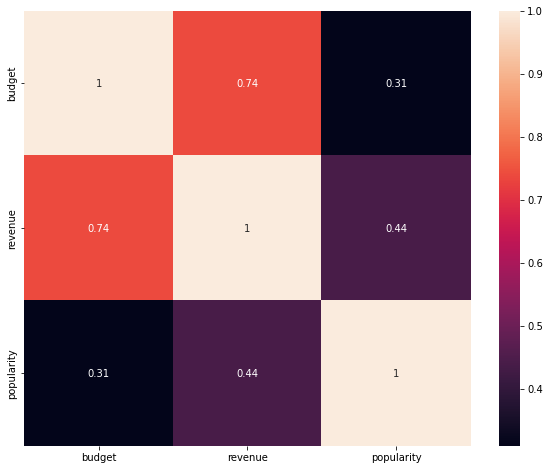

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(clean_data.corr().round(decimals=2), annot=True)
plt.show()

## This is the correlation matrix of the features.

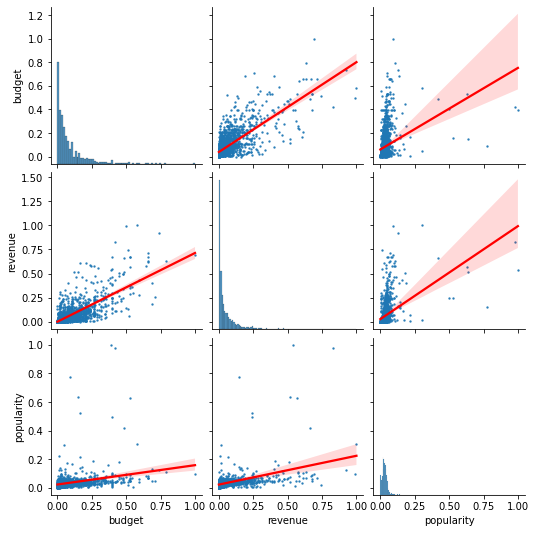

In [18]:
plot_kws = {'scatter_kws': {'s': 2}, 'line_kws': {'color': 'red'}}
sns.pairplot(clean_data, kind='reg', vars=clean_data.columns[:], plot_kws=plot_kws)
plt.show()

## Here's the scatter plots for each pair of features and the red area indicate the variance and spreading of data points over those features

## Now for deciding the number of sub groups we use the ELBO algorithm with Calinski metric.

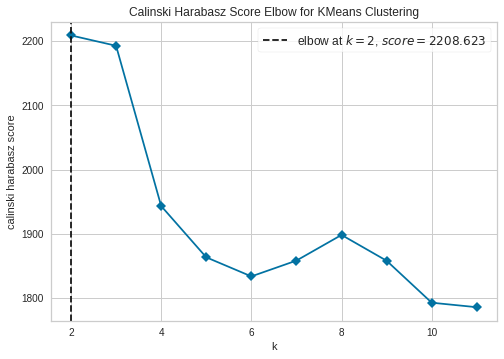

In [14]:
X = clean_data.values


# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,12), metric='calinski_harabasz', timings=False
)

visualizer.fit(X)        
visualizer.show()

# As you can see the k = 2 clusters has the highest scores, so we tend to use the KMeans algoithm with two cluster.

## We train and cluster data point with KMeans algoithm

In [16]:
k_means_optimum = KMeans(n_clusters = 2, init = 'k-means++',  random_state=42)
y = k_means_optimum.fit_predict(X)

clean_data['cluster'] = y  

data1 = clean_data[clean_data.cluster==0]
data2 = clean_data[clean_data.cluster==1]

## For validating our clustering visually, we use the PCA and draw and color data points based on our clustering results for each two pair of our three PCA components.

In [17]:
n_components = 3

pca = PCA(n_components=n_components)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

labels = {str(i): f"PC {i+1}" for i in range(n_components)}
labels['color'] = 'Median Price'

fig = px.scatter_matrix(
    components,
    color=y,
    dimensions=range(n_components),
    labels=labels,
    title=f'Total Explained Variance: {total_var:.2f}%',
)
fig.update_traces(diagonal_visible=False)
fig.show()

## As you can see data points are well seperated in most of the coordinate of principle components. So we can have the understanding that our clustering is doing well enough.

## Then we visualize data points in 3d with three features and see how they'll be seperated.

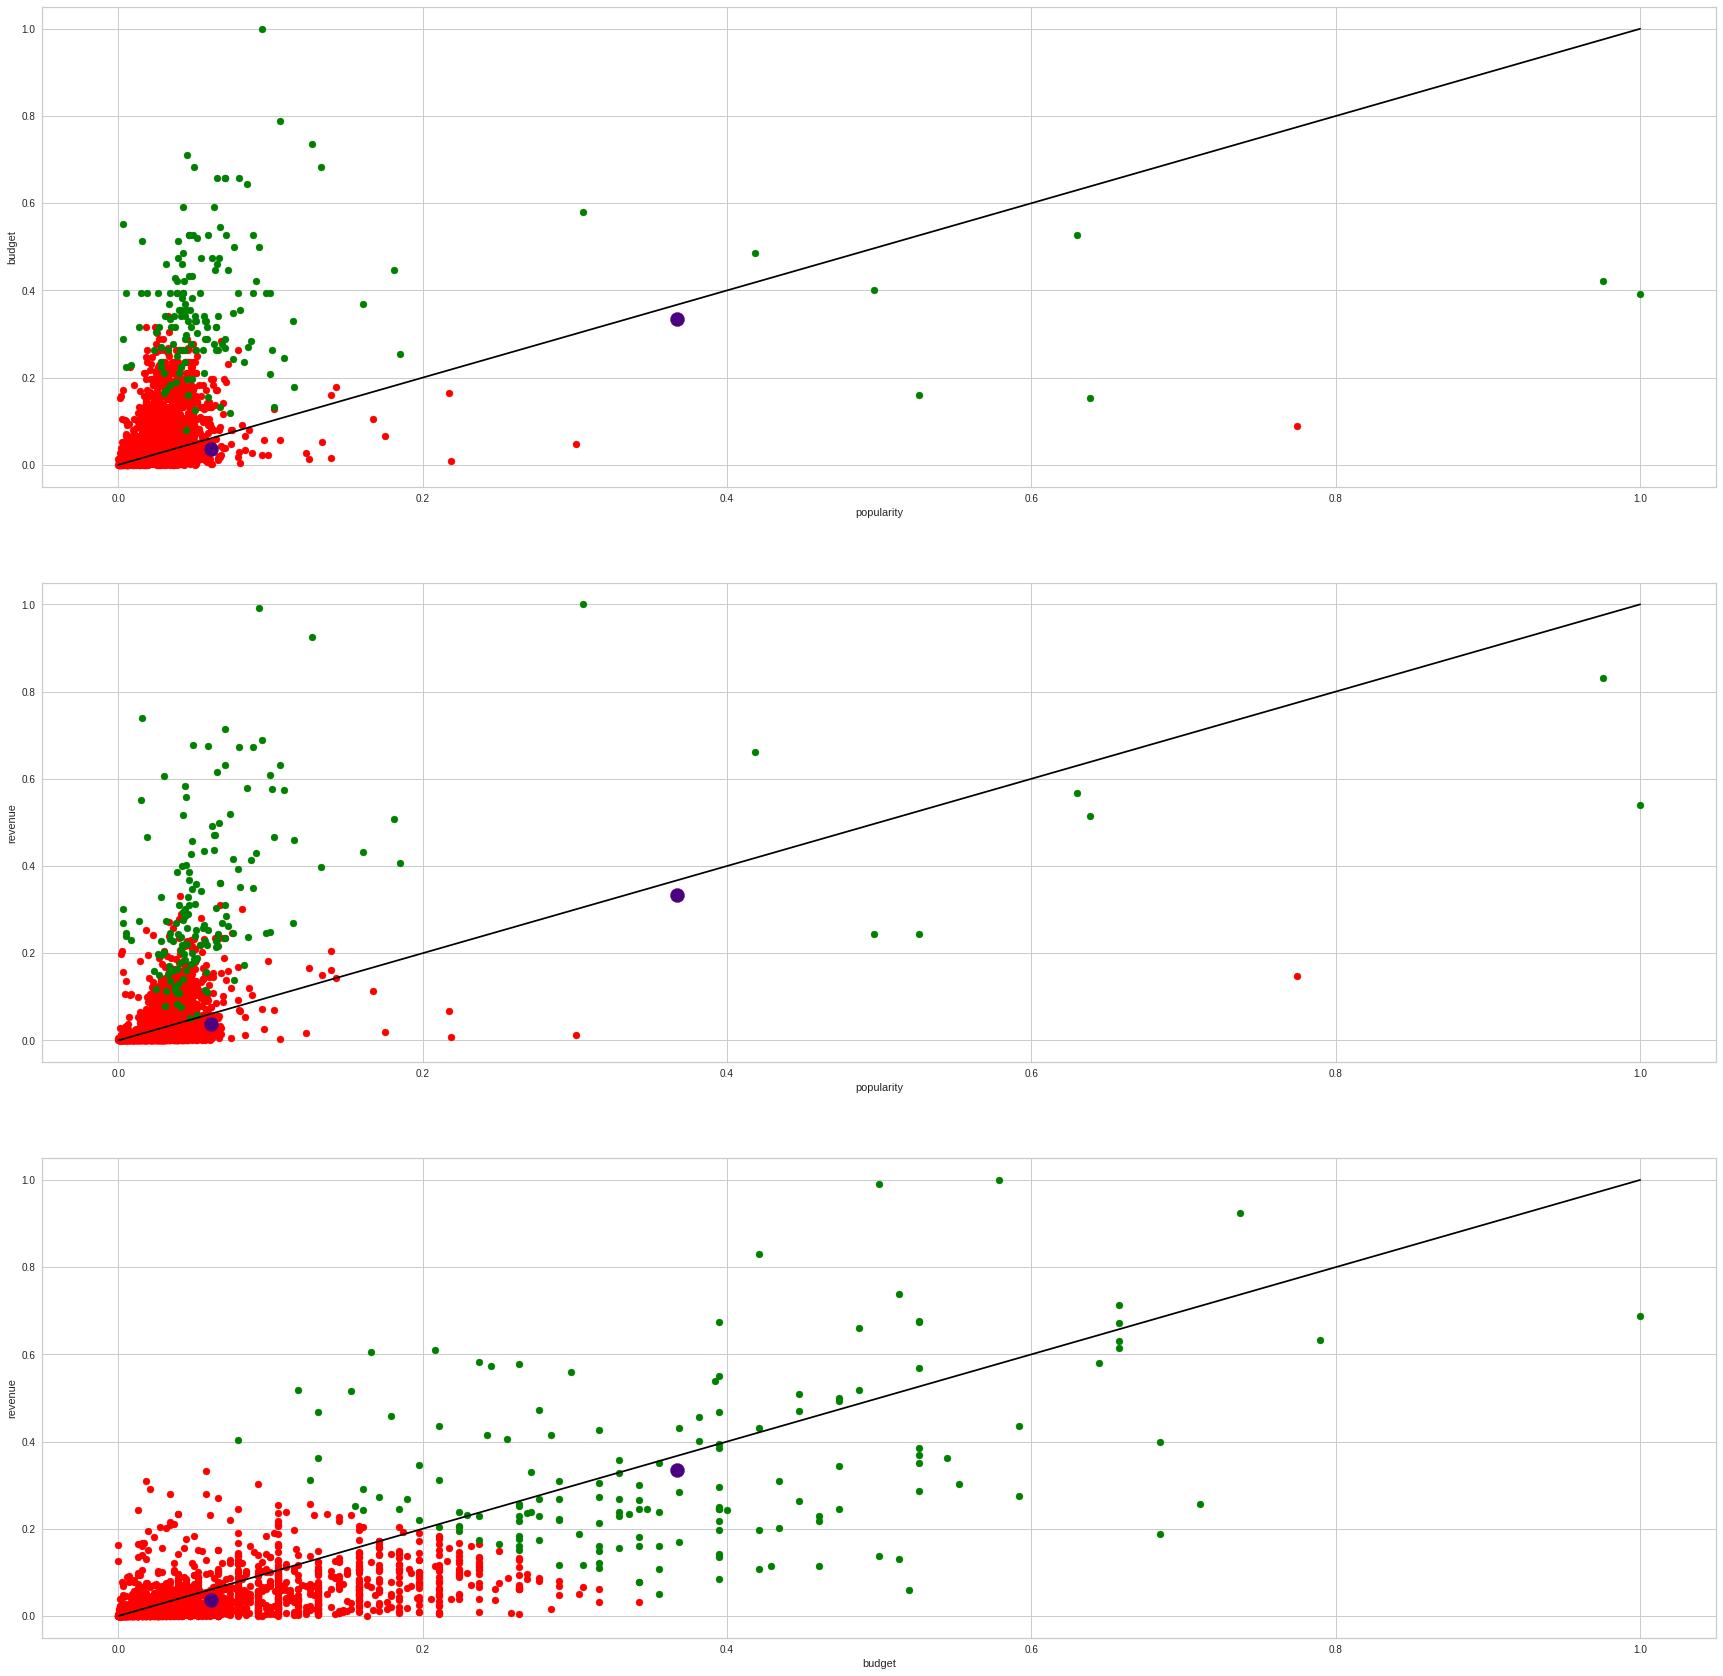

In [37]:
fig, ax = plt.subplots(3, figsize=(30,30))

xline = np.linspace(0, 1, 10)
yline = np.linspace(0, 1, 10)
ax[0].plot(xline, yline, 'black')
ax[0].scatter(data1.popularity, data1.budget, c='red', label = 'Cluster 1')
ax[0].scatter(data2.popularity,data2.budget,c ='green', label = 'Cluster 2')
ax[0].set_xlabel('popularity')
ax[0].set_ylabel('budget')
ax[0].scatter(k_means_optimum.cluster_centers_[:,0], k_means_optimum.cluster_centers_[:,1], color = 'indigo', s = 200)

ax[1].plot(xline, yline, 'black')
ax[1].scatter(data1.popularity, data1.revenue, c='red', label = 'Cluster 1')
ax[1].scatter(data2.popularity,data2.revenue,c ='green', label = 'Cluster 2')
ax[1].set_xlabel('popularity')
ax[1].set_ylabel('revenue')
ax[1].scatter(k_means_optimum.cluster_centers_[:,0], k_means_optimum.cluster_centers_[:,1], color = 'indigo', s = 200)

ax[2].plot(xline, yline, 'black')
ax[2].scatter(data1.budget, data1.revenue, c='red', label = 'Cluster 1')
ax[2].scatter(data2.budget, data2.revenue,c ='green', label = 'Cluster 2')
ax[2].set_xlabel('budget')
ax[2].set_ylabel('revenue')
ax[2].scatter(k_means_optimum.cluster_centers_[:,0], k_means_optimum.cluster_centers_[:,1], color = 'indigo', s = 200)

plt.show()

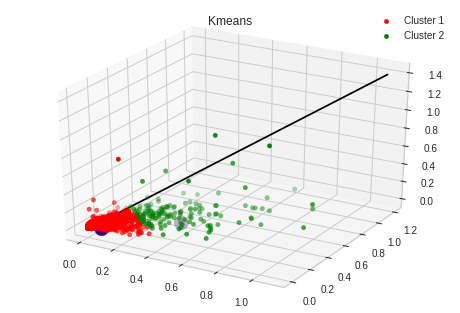

In [40]:
kplot = plt.axes(projection='3d')
xline = np.linspace(0, 1.1, 10)
yline = np.linspace(0, 1.2, 10)
zline = np.linspace(0, 1.4, 10)
kplot.plot3D(xline, yline, zline, 'black')
kplot.scatter3D(data1.revenue, data1.budget, data1.popularity, c='red', label = 'Cluster 1')
kplot.scatter3D(data2.revenue,data2.budget,data2.popularity,c ='green', label = 'Cluster 2')
# kplot.scatter3D(data3.budget,data3.revenue,data3.popularity,c ='blue', label = 'Cluster 3')
# kplot.scatter3D(data4.budget,data4.revenue,data4.popularity, label = 'Cluster 4')
# kplot.scatter3D(data5.budget,data5.revenue,data5.popularity, label = 'Cluster 5')
# kplot.scatter3D(data6.budget,data6.revenue,data6.popularity, label = 'Cluster 6')
# kplot.scatter3D(data7.budget,data7.revenue,data7.popularity, label = 'Cluster 7')

plt.scatter(k_means_optimum.cluster_centers_[:,0], k_means_optimum.cluster_centers_[:,1], color = 'indigo', s = 200)
plt.legend()
plt.title("Kmeans")
plt.show()

## As you can see data points are seperated nicely in 3d too.

## Now for numerical validation of our clustering we calculate the Silhouette score.

In [24]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X,y)

print(score)

0.7488554173592906


## The 0.74 score is a very good score for clustering.

## As you can see the movies that lies near the x = y line in the budget and revenue coordinate have less populaity than others. This shows us that the movies that nealy cost as much as they sell are likely to be unpopular and we can observe in the budget-revenue 2d plot that movies nearly take up for their on due to the fact that in this plot the center of subgroups has been contained in the clusters properly and we don't see very bad outlier data points.

## If we compare the first 2d plots we can conclude that budget and revenue act alike versus popularity.

## The green cluster is the cluster of money making movies, aka the movies in this cluster make more money than the other cluster and they have a near one correlation with budget and as their budget are higher they have higher revenue. In other words, there is not any high revenue movie which low budget. This illustrate the taste of people, which they surely watch the movies with high budget and this make these movie's revenue high as well. Although, movies with low budget are approximately more successful to be popular for viewers.

## There's a conflict that people watch high budget movie, whereas they don't like them much and they are not popular. 

# Sixth

So we create a dataset with following features: 

```
[budget, runtime, number_of_casts, revenue, popularity]
```

Then we use outlier detection algorithms to detect outliers.


In [89]:
years = []
for i in data.index.values:
    a = 0
    if data.release_date[i] == data.release_date[i]:
        a = int([str(i) for i in data.release_date[i].split('/')][2])
        if a < 23:
            a += 2000
        else:
            a += 1900
        const = 1
    years += [a]

data['years'] = years

cast_number = []

for i in data.index.values:
  if data.cast[i] == data.cast[i]:
    cast_number += [len(data.cast[i].split('}'))]
  else:
    cast_number += [0]

data['number_of_casts'] = cast_number
df = data[['budget', 'runtime', 'number_of_casts', 'revenue', 'popularity']]


df[df['budget'] == 0]
df = df[df.budget > 10000]
df[df['runtime'] != df['runtime']] = int(np.mean(df['runtime']))

df.dropna()

from sklearn import preprocessing

x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled, columns=df.columns)

print(df.shape)

(2160, 5)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## We use Isolation Forest algorithm which is a algoithm based on clustering and is able to detect outliers.

In [90]:
X = df.values
# identify outliers in the training dataset
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X)

print(len(yhat[yhat == -1]))

df['y'] = yhat
data1 = df[df.y==1]
data2 = df[df.y==-1]

k_means_optimum = KMeans(n_clusters = 2, init = 'k-means++',  random_state=42)
df.cluster = yhat

data1 = df[df.cluster==-1]
data2 = df[df.cluster==1]

216


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



## We find 216 outlier data points out of 2100 data points.

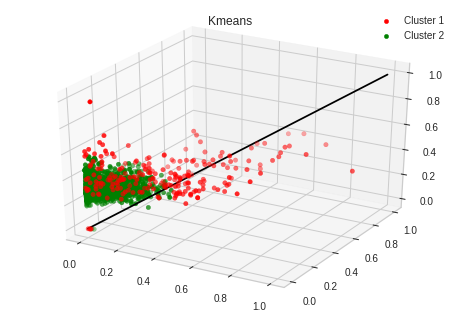

In [91]:
kplot = plt.axes(projection='3d')
xline = np.linspace(0, 1, 10)
yline = np.linspace(0, 1, 10)
zline = np.linspace(0, 1, 10)
kplot.plot3D(xline, yline, zline, 'black')
# Data for three-dimensional scattered points
kplot.scatter3D(data1.budget, data1.revenue, data1.runtime, c='red', label = 'Cluster 1')
kplot.scatter3D(data2.budget, data2.revenue, data2.runtime,c ='green', label = 'Cluster 2')

plt.legend()
plt.title("Kmeans")
plt.show()

## The 3d plot with coordinates budget, revenue, runtime for x, y, z respectively. The red points are the points that we detected as outlier data points. As you can see most of them are really far from the main cluster and they are suitable for thos who wants to 'swim agains the current'. 

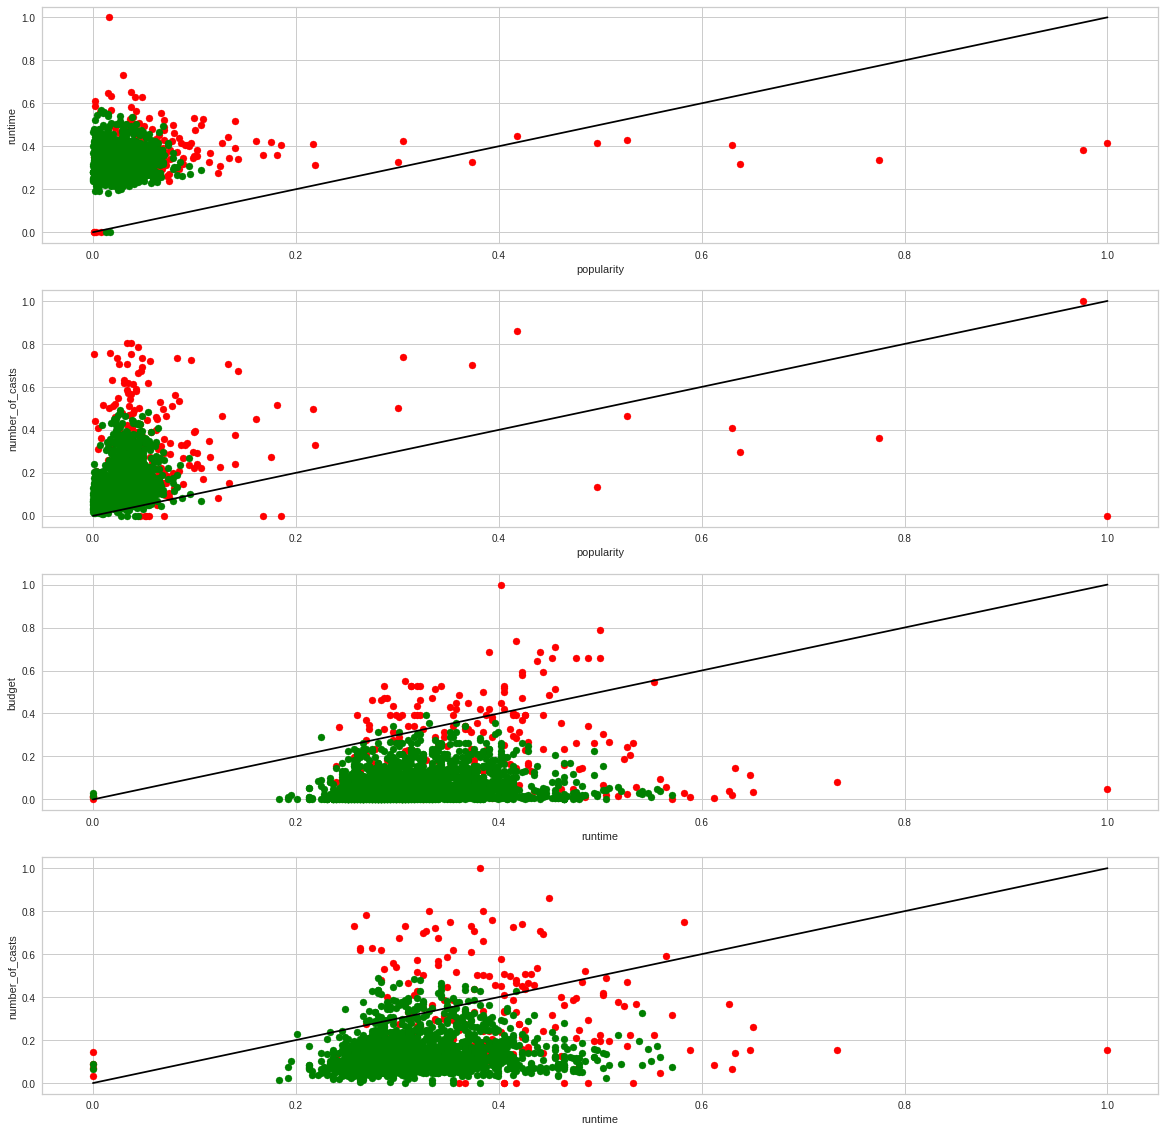

In [92]:
fig, ax = plt.subplots(4, figsize=(20,20))

xline = np.linspace(0, 1, 10)
yline = np.linspace(0, 1, 10)
ax[0].plot(xline, yline, 'black')
ax[0].scatter(data1.popularity, data1.runtime, c='red', label = 'Cluster 1')
ax[0].scatter(data2.popularity,data2.runtime,c ='green', label = 'Cluster 2')
ax[0].set_xlabel('popularity')
ax[0].set_ylabel('runtime')

ax[1].plot(xline, yline, 'black')
ax[1].scatter(data1.popularity, data1.number_of_casts, c='red', label = 'Cluster 1')
ax[1].scatter(data2.popularity,data2.number_of_casts,c ='green', label = 'Cluster 2')
ax[1].set_xlabel('popularity')
ax[1].set_ylabel('number_of_casts')

ax[2].plot(xline, yline, 'black')
ax[2].scatter(data1.runtime, data1.budget, c='red', label = 'Cluster 1')
ax[2].scatter(data2.runtime, data2.budget,c ='green', label = 'Cluster 2')
ax[2].set_xlabel('runtime')
ax[2].set_ylabel('budget')

ax[3].plot(xline, yline, 'black')
ax[3].scatter(data1.runtime, data1.number_of_casts, c='red', label = 'Cluster 1')
ax[3].scatter(data2.runtime, data2.number_of_casts,c ='green', label = 'Cluster 2')
ax[3].set_xlabel('runtime')
ax[3].set_ylabel('number_of_casts')

plt.show()

## As you can see in each 2d plot there are some very good detected outlies, this shows us the fact that our detection of outlier is robust to features and our outlier detection works pretty well.

For last validation we use the one class SVM and draw the 2d coordinates for runtime and revenue.

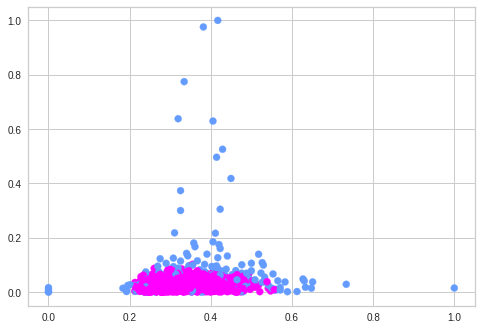

In [96]:
scaler = StandardScaler()
X_train_noise_scaled = scaler.fit_transform(X)
oneclass = OneClassSVM(nu=.1).fit(X_train_noise_scaled)
pred = oneclass.predict(X_train_noise_scaled)
cmap = plt.cm.get_cmap("cool")
plt.scatter(X[:, 1], X[:, 4], c=cmap((pred + 2) * 100))
plt.show()

df.cluster = pred
data1 = df[df.cluster==-1]
data2 = df[df.cluster==1]

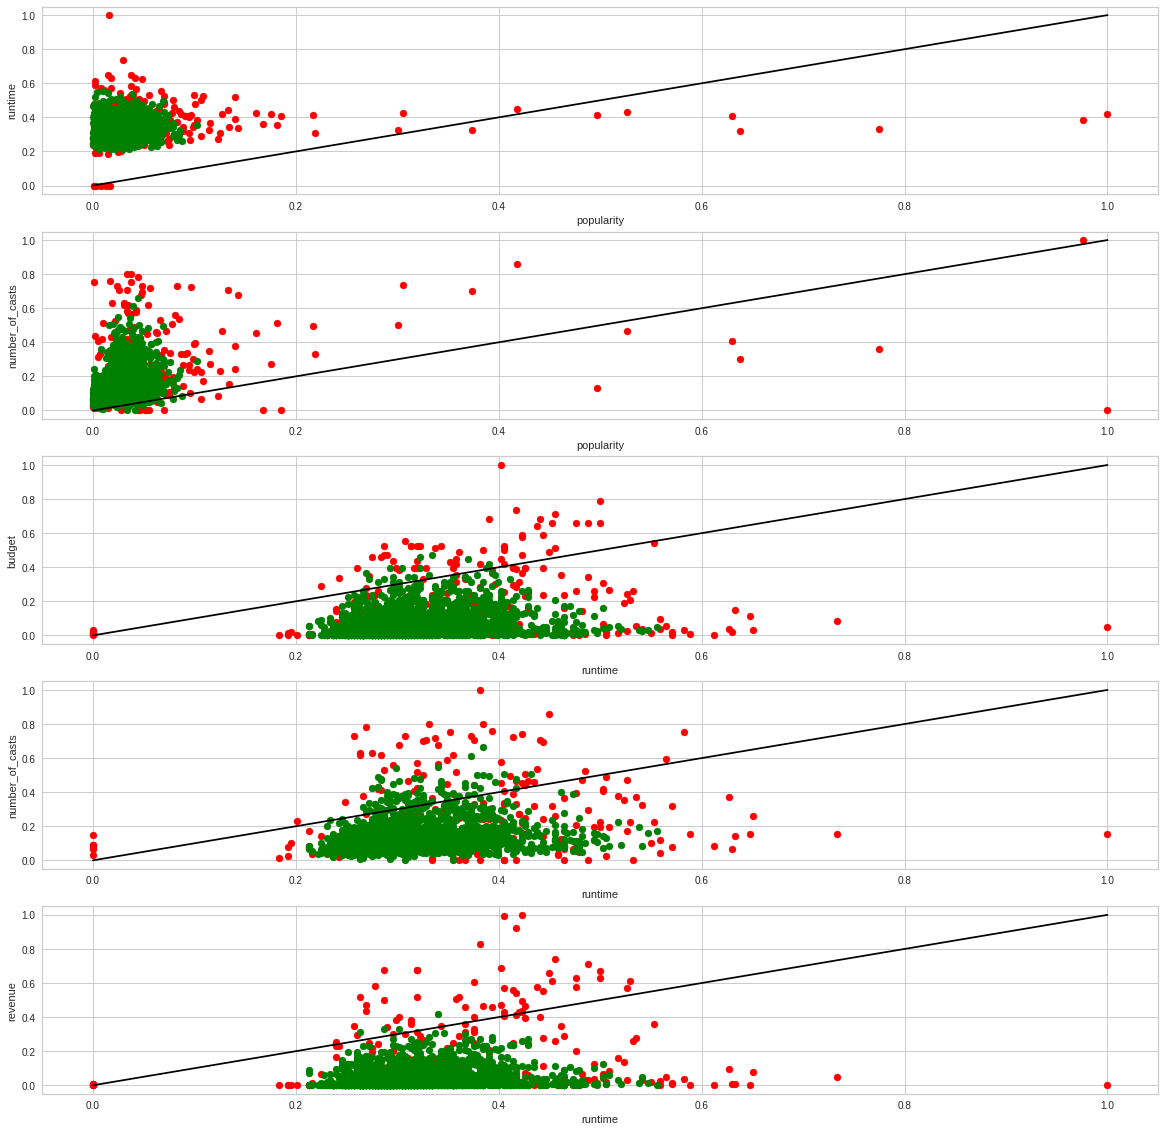

In [98]:
fig, ax = plt.subplots(5, figsize=(20,20))

xline = np.linspace(0, 1, 10)
yline = np.linspace(0, 1, 10)
ax[0].plot(xline, yline, 'black')
ax[0].scatter(data1.popularity, data1.runtime, c='red', label = 'Cluster 1')
ax[0].scatter(data2.popularity,data2.runtime,c ='green', label = 'Cluster 2')
ax[0].set_xlabel('popularity')
ax[0].set_ylabel('runtime')

ax[1].plot(xline, yline, 'black')
ax[1].scatter(data1.popularity, data1.number_of_casts, c='red', label = 'Cluster 1')
ax[1].scatter(data2.popularity,data2.number_of_casts,c ='green', label = 'Cluster 2')
ax[1].set_xlabel('popularity')
ax[1].set_ylabel('number_of_casts')

ax[2].plot(xline, yline, 'black')
ax[2].scatter(data1.runtime, data1.budget, c='red', label = 'Cluster 1')
ax[2].scatter(data2.runtime, data2.budget,c ='green', label = 'Cluster 2')
ax[2].set_xlabel('runtime')
ax[2].set_ylabel('budget')

ax[3].plot(xline, yline, 'black')
ax[3].scatter(data1.runtime, data1.number_of_casts, c='red', label = 'Cluster 1')
ax[3].scatter(data2.runtime, data2.number_of_casts,c ='green', label = 'Cluster 2')
ax[3].set_xlabel('runtime')
ax[3].set_ylabel('number_of_casts')

ax[4].plot(xline, yline, 'black')
ax[4].scatter(data1.runtime, data1.revenue, c='red', label = 'Cluster 1')
ax[4].scatter(data2.runtime, data2.revenue,c ='green', label = 'Cluster 2')
ax[4].set_xlabel('runtime')
ax[4].set_ylabel('revenue')

plt.show()

## As you can see with this approach we are able to detect outlier properly.